# **Heapq**

Модуль **heapq** в несколько раз облегчает написание программ, использующих такую структуру данных как куча. Куча—это древовидная структура данных, в которой между дочерними и родительскими узами установлены отношения порядка сортировки.

Модуль **heapq** использует алгоритмы **min-heap** для поддержания списка в "почти
отсортированном состоянии" по мере вставки и извлечения его элементов. Выпол-
няемые модулем **heapq** операции работают быстрее, чем вызов метода **sort**.

Данные для примера:

In [ ]:
#heapq_heapdata.py

# Эти данные сгенерированы c помощью модуля random
data = [19, 9, 4, 10, 11]

Для вывода данных кучи используется файл heapq_showtree.py.


In [ ]:
#heapq_showtree.py

import math
from io import StringIO


def show_tree(tree, total_width=36, fill=' '):
    """Красивый вывод дерева"""
    output = StringIO()
    last_row = -1
    for i, n in enumerate(tree):
        if i:
            row = int(math.floor(math.log(i + 1, 2)))
        else:
            row = 0
        if row != last_row:
            output.write('\n')
        columns = 2 ** row
        col_width = int(math.floor(total_width / columns))
        output.write(str(n).center(col_width, fill))
        last_row = row
    print(output.getvalue())
    print('-' * total_width)
    print()

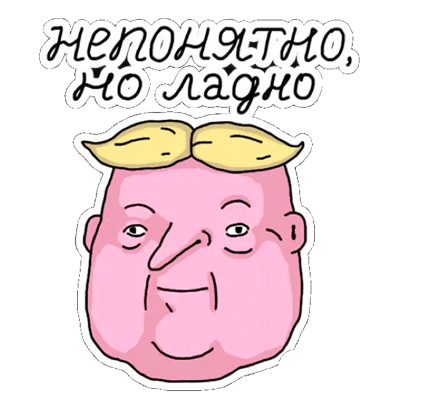

# **Создание кучи**

Существуют два основных способа создания кучи: c помощью методов
**heappush()** и **heapify()**.

**heappush** вставляет элемент в список, удовлетворяющий условию кучи,
и переставляет оставшиеся элементы таким образом, чтобы условие кучи
удовлетворялось и после вставки элемента.

**heapify** выполняет перестановку элементов для преобразования списка в кучу,
удовлетворяющую условию min heap. Если список удовлетворяет условию кучи типа min heap, то первый элемент списка является наименьшим (или равным наименьшему).

Создание кучи: 

In [ ]:
#heapq_heappush.py

import heapq
from heapq_showtree import show_tree
from heapq_heapdata import data

heap = []
print('random :', data)
print()

for n in data:
    print('add {:>3}:'.format(n))
    heapq.heappush(heap, n)
    show_tree(heap)

random : [19, 9, 4, 10, 11]

add  19:

                 19                 
------------------------------------

add   9:

                 9                  
        19        
------------------------------------

add   4:

                 4                  
        19                9         
------------------------------------

add  10:

                 4                  
        10                9         
    19   
------------------------------------

add  11:

                 4                  
        10                9         
    19       11   
------------------------------------

In [ ]:
#heapq_heapify.py

import heapq
from heapq_showtree import show_tree
from heapq_heapdata import data

print('random    :', data)
heapq.heapify(data)
print('heapified :')
show_tree(data)

random    : [19, 9, 4, 10, 11]

heapified :

                 4                  
        9                 19        
    10       11   
------------------------------------

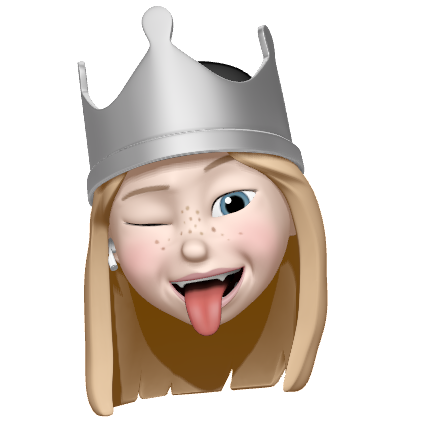 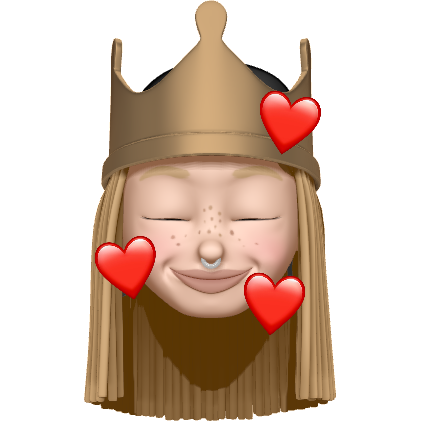

# **Доступ к содержимому кучи**

Для удаления элемента c наименьшим значением из корректно организованной кучи используется метод **heappop()**. Он удаляет и возвращает наименьший (первый) элемент
списка, удовлетворяющего условию кучи, и переставляет оставшиеся
элементы таким образом, чтобы условие кучи удовлетворялось и после
удаления элемента.

In [ ]:
#heapq_heappop.py

import heapq
from heapq_showtree import show_tree
from heapq_heapdata import data

print('random    :', data)
heapq.heapify(data)
print('heapified :')
show_tree(data)
print()

for i in range(2):
    smallest = heapq.heappop(data)
    print('pop    {:>3}:'.format(smallest))
    show_tree(data)

Для удаления существующих элементов и замены их новыми значениями в
рамках одной операции используйте метод **heapreplace()**. **heapreplace()**  сначала удаляет и возвращает наименьший элемент из кучи, а потом добавляет новый элемент. Размер кучи не меняется.

In [ ]:
#heapq_heapreplace.py

import heapq
from heapq_showtree import show_tree
from heapq_heapdata import data

heapq.heapify(data)
print('start:')
show_tree(data)

for n in [0, 13]:
    smallest = heapq.heapreplace(data, n)
    print('replace {:>2} with {:>2}:'.format(smallest, n))
    show_tree(data)

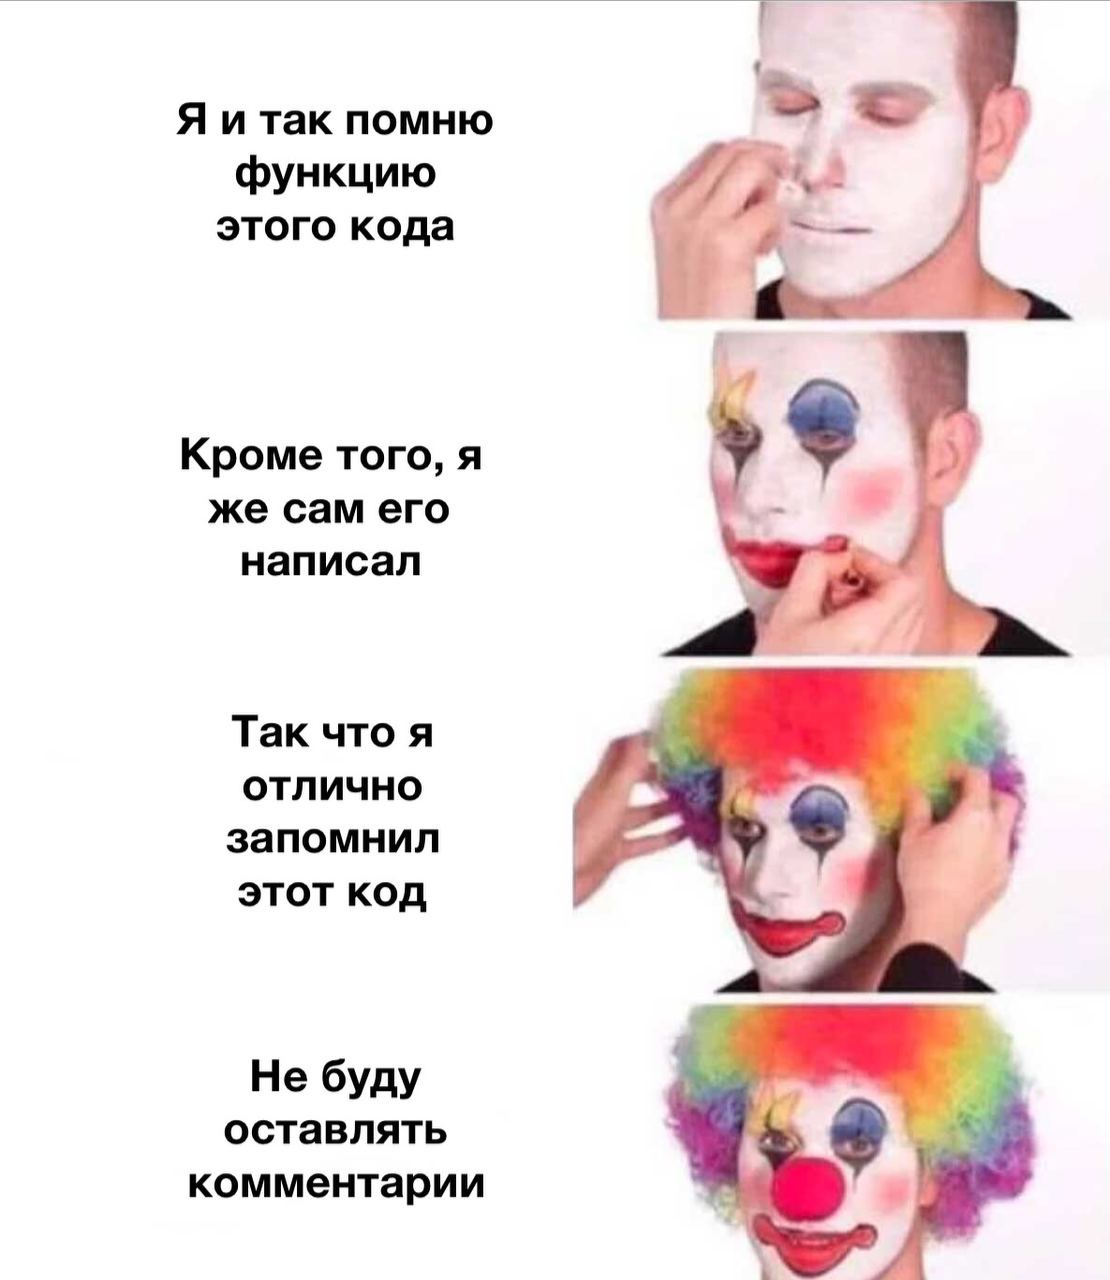

# **Получение наибольших и наименьших элементов кучи**

Модуль **heapq** предоставляет две функции, позволяющие находить диапазоны
наибольших и наименьших значений, содержащихся в итерируемом объекте.

**nlargest** возвращает отсортированный в порядке убывания список n наибольших
элементов итерируемого объекта.

**nsmallest** возвращает отсортированный в порядке возрастания список n наименьших элементов итерируемого объекта.

In [ ]:
#heapq_extremes.py

import heapq
from heapq_heapdata import data

print('all       :', data)
print('3 largest :', heapq.nlargest(3, data))
print('from sort :', list(reversed(sorted(data)[-3:])))
print('3 smallest:', heapq.nsmallest(3, data))
print('from sort :', sorted(data)[:3])

# **Эффективное слияние отсортированных последовательностей**

  В случае небольших наборов данных объединение двух отсортированных по-
следовательностей в одну не составляет большого труда. 

Однако в случае крупных наборов данных этот прием может потребовать использования больших объемов памяти. Вместо сортировки всей объединенной последовательности метод **merge()**.

**merge()** возвращает итератор, выдающий отсортированные (в порядке возрастания)
элементы совокупности итерируемых объектов, каждый из которых должен
быть отсортированным в порядке возрастания.

In [ ]:
#heapq_merge.py

import heapq
import random


random.seed(2016)

data = []
for i in range(4):
    new_data = list(random.sample(range(1, 101), 5))
    new_data.sort()
    data.append(new_data)

for i, d in enumerate(data):
    print('{}: {}'.format(i, d))

print('\nMerged:')
for i in heapq.merge(*data):
    print(i, end=' ')
print()

0: [33, 58, 71, 88, 95]
1: [10, 11, 17, 38, 91]
2: [13, 18, 39, 61, 63]
3: [20, 27, 31, 42, 45]

Merged:
10 11 13 17 18 20 27 31 33 38 39 42 45 58 61 63 71 88 91 95 


# **Bisect**

Модуль **bisect** реализует алгоритм вставки элементов в список, обеспечивающий поддержание сортированного состояния списка. Модуль обеспечивает поддержку списка в отсортированном порядке с помощью алгоритма деления пополам.

# **Сортировка при вставке**

**insort()** осуществляет вставку элемента в отсортированный список, при этом элемент располагается как можно правее (все элементы, равные ему, остаются слева).

In [ ]:
#bisect_example.py

import bisect

# Последовательность случайных чисел
values = [14, 85, 77, 26, 50, 45, 66, 79, 10, 3, 84, 77, 1]

print('New Pos Contents')
print ('--- --- --------')

l = []
for i in values:
    position = bisect.bisect(l, i)
    bisect.insort(l, i)
    print('{:3} {:3}'.format(i, position), l)

New Pos Contents
--- --- --------
 14   0 [14]
 85   1 [14, 85]
 77   1 [14, 77, 85]
 26   1 [14, 26, 77, 85]
 50   2 [14, 26, 50, 77, 85]
 45   2 [14, 26, 45, 50, 77, 85]
 66   4 [14, 26, 45, 50, 66, 77, 85]
 79   6 [14, 26, 45, 50, 66, 77, 79, 85]
 10   0 [10, 14, 26, 45, 50, 66, 77, 79, 85]
  3   0 [3, 10, 14, 26, 45, 50, 66, 77, 79, 85]
 84   9 [3, 10, 14, 26, 45, 50, 66, 77, 79, 84, 85]
 77   8 [3, 10, 14, 26, 45, 50, 66, 77, 77, 79, 84, 85]
  1   0 [1, 3, 10, 14, 26, 45, 50, 66, 77, 77, 79, 84, 85]


В первом столбце вывода отображается новое случайное число, а во втором — позиция, в которую вставляется это число. Остальная часть каждой строки пред-
ставляет текущее состояние отсортированного списка.

# **Обработка повторяющихся значений**

Модуль **bisect** обеспечивает два способа обработки повторяющихся значений: новые значения могут вставляться либо слева от существующих,
либо справа. В действительности функция** insort()** является псевдонимом функции **insort_right()** (что можно понять из определения, в прошлом примере), которая вставляет элемент после существующего значения.

**insort()**, **insort_right()**
Вставка элемента в отсортированный список, при этом элемент располагается как можно правее (все элементы, равные ему, остаются слева).

**insort_left()**
Вставка элемента в отсортированный список, при этом элемент располагается как можно левее (все элементы, равные ему, остаются справа).

In [ ]:
#bisect_example2.py

import bisect

# Последовательность случайных чисел
values = [14, 85, 77, 26, 50, 45, 66, 79, 10, 3, 84, 77, 1]

print('New Pos Contents')
print ('--- --- --------')

# Используются функции bisect_left() и insort_left()
l = []
for i in values:
    position = bisect.bisect_left(l, i)
    bisect.insort_left(l, i)
    print('{:3} {:3}'.format(i, position), l)



New Pos Contents
--- --- --------
 14   0 [14]
 85   1 [14, 85]
 77   1 [14, 77, 85]
 26   1 [14, 26, 77, 85]
 50   2 [14, 26, 50, 77, 85]
 45   2 [14, 26, 45, 50, 77, 85]
 66   4 [14, 26, 45, 50, 66, 77, 85]
 79   6 [14, 26, 45, 50, 66, 77, 79, 85]
 10   0 [10, 14, 26, 45, 50, 66, 77, 79, 85]
  3   0 [3, 10, 14, 26, 45, 50, 66, 77, 79, 85]
 84   9 [3, 10, 14, 26, 45, 50, 66, 77, 79, 84, 85]
 77   7 [3, 10, 14, 26, 45, 50, 66, 77, 77, 79, 84, 85]
  1   0 [1, 3, 10, 14, 26, 45, 50, 66, 77, 77, 79, 84, 85]


# **Queue**

Модуль **queue** предоставляет структуру данных c дисциплиной обслуживания **first in, first out** — *«первым пришёл — первым ушёл»* (англ. **FIFO**). В отличие от списков и массивов, очереди, как правило, не пропускают случайный доступ к содержащимся объектам.

**Аналогия очереди first-in, first-out на пальцах**
Представьте ряд питонистов, в ожидании получения бейджиков на конференции в день регистрации на **PyCon**. Новые дополнения в ряде находятся в конце очереди, так как новые люди становятся в очередь на конференцию в ожидании бейджиков. Сокращение очереди (подача) происходит в её начале, так как разработчики получают свои бейджи с новыми кепками с надписью SWAG и покидают очередь.

# **Базовая очередь FIFO**

Элементы добавляются в один конец c помощью метода
put() и удаляются на другом c помощью метода get() (**FIFO**).

Метод **get** удаляет элемент из очереди и возвращает его, если в очереди имеются элементы.

Метод **put** добавляет элемент в очередь при условии, что она не заполнена.


In [ ]:
#queue_fifo.py

import queue

q = queue.Queue()

for i in range(5):
    q.put(i)
    
while not q.empty():
    print(q.get(), end=' ')
print()

0 1 2 3 4 


Можно заметить, что элементы удаляются из очереди
в том порядке, в котором они добавлялись.

# **Очередь LIFO**

В случае с очередью вы удаляете объект, который был недавно добавлен (по принципу первый вошел – первым вышел **first-in, first-out** или **FIFO**), в случае со стеком вы удаляете последний добавленный элемент (последним зашел – первым вышел, **last-in, first-out** или **LIFO**).



In [ ]:
#queue_lifo.py

import queue

q = queue.LifoQueue()

for i in range(5):
    q.put(i)

while not q.empty():
    print(q.get(), end=' ')
print()

4 3 2 1 0 


Здесь из очереди удаляется элемент, который был добавлен в нее последним.

# **Очередь c приоритетом**

Иногда порядок обработки элементов очереди должен основываться не на
последовательности их создания или добавления в очередь, а на их характеристиках.

Класс **PriorityQueue** использует упорядочение очереди по приоритетам для принятия решения относительно того, какой из элементов следует извлечь.

**PriorityQueue** - это подкласс **Queue**. Единственным различием
между ними является то, что **PriorityQueue** реализует очередь
с приоритетом - каждый раз извлекается элемент, имеющий
наименьшее значение в очереди.


In [ ]:
#queue_priority.py

import functools
import queue
import threading

@functools.total_ordering
class Job:
    
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description
        print('New job:', description)
        return
    def __eq__(self, other):
        try:
            return self.priority == other.priority
        except AttributeError:
            return NotImplemented
    def __lt__ (self, other):
        try:
            return self.priority < other.priority
        except AttributeError:
            return NotImplemented
        
q = queue.PriorityQueue()

q.put(Job(3, 'Mid-level job'))
q.put(Job(10, 'Low-level job'))
q.put(Job(1, 'Important job'))

def process_job(q):
    while True:
        next_job = q.get()
        print('Processing job:', next_job.description)
        q.task_done()
        
workers = [
    threading.Thread(target=process_job, args=(q,)),
    threading.Thread(target=process_job, args=(q,)),
]
for w in workers:
    w.setDaemon(True)
    w.start()
    
q.join()

New job: Mid-level job
New job: Low-level job
New job: Important job
Processing job: Important job
Processing job: Mid-level job
Processing job: Low-level job


# **Создание многопоточного подкаст-клиента**



In [ ]:
#fetch_podcasts.py

from queue import Queue
import threading
import time
import urllib
from urllib.parse import urlparse

import feedparser

# Установка некоторых глобальных переменных
num_fetch_threads = 2
enclosure_queue = Queue()

# В реальном приложении вы не будете задавать данные в коде...
feed_urls = [
    'http://talkpython.fm/episodes/rss',
]

def message(s):
    print('{}: {}'.format(threading.current_thread().name, s))

#Выполняется в рабочем потоке и обрабатывает закачки c помощыо модуля urllib.    
def download_enclosures(q): 

    """Это функция рабочего потока.
    Она обрабатывает элементы очереди один за другим.
    Потоки этого процесса-демона входят в бесконечный
    цикл и завершаются, только когда завершается
    основной поток."""
    
    while True:
        message('looking for the next enclosure')
        url = q.get()
        filename = url.rpartition('/')[-1]
        message('downloading {}'.format(filename))
        response = urllib.request.urlopen(url)
        data = response.read()
        # Сохранить загруженный файл в текущем каталоге
        message('writing to {}'.format(filename))
        with open(filename, 'wb') as outfile:
            outfile.write(data)
        q.task_done()
    
# Настройка потоков для извлечения вложений
for i in range(num_fetch_threads):
    worker = threading.Thread(
        target=download_enclosures,
        args=(enclosure_queue,),
        name='worker-{}'.format(i),
    )
    worker.setDaemon(True)
    worker.start()
    
# Загрузка каналов и помещение URL-адресов вложений в очередь
for url in feed_urls:
    response = feedparser.parse(url, agent='fetch_podcasts.py')
    for entry in response['entries'][:5]:
        for enclosure in entry.get('enclosures', []):
            parsed_url = urlparse(enclosure['url'])
            message('queuing {}'.format(
                parsed_url.path.rpartition('/')[-1]))
            enclosure_queue.put(enclosure['url'])
            
# Дождаться исчерпания очереди, что будет свидетельствовать
# о завершении обработки всех закачек
message('*** main thread waiting')
enclosure_queue.join()
message('*** done')